Let's build a classification model to recognize MNIST digits using TensorFlow.

 This project will include downloading the dataset, preprocessing the data, building a neural network, training the model, and evaluating its performance.

# Step 1: Import Required Libraries


Start by importing the necessary libraries:

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


# Step 2: Load and Explore the MNIST Dataset


The MNIST dataset is included in TensorFlow. It contains 60,000 training and 10,000 test images of handwritten digits (0–9).

Training data shape: (60000, 28, 28), Labels shape: (60000,)
Test data shape: (10000, 28, 28), Labels shape: (10000,)


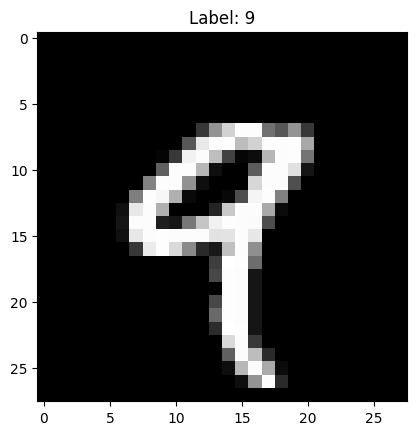

In [5]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Explore the dataset
print(f"Training data shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Labels shape: {y_test.shape}")


# Display the first image
plt.imshow(X_train[4], cmap='gray')
plt.title(f"Label: {y_train[4]}")
plt.show()


# Step 3: Preprocess the Data

Normalize pixel values to a range of 0 to 1.

Reshape the data to fit the input shape of the neural network.




In [6]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Check the range after normalization
print(f"Normalized range: {X_train.min()} to {X_train.max()}")

# Reshape the data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


Normalized range: 0.0 to 1.0


# Step 4: Build the Model

Create a simple neural network using TensorFlow's Keras API.

In [7]:
# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into a 1D vector
    Dense(128, activation='relu'), # Hidden layer with 128 neurons
    Dense(10, activation='softmax') # Output layer with 10 classes (0–9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


d:\TENSOR FLOW\venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# Step 5: Train the Model


Fit the model to the training data.

In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8668 - loss: 0.4769 - val_accuracy: 0.9573 - val_loss: 0.1499
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9610 - loss: 0.1379 - val_accuracy: 0.9632 - val_loss: 0.1212
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9742 - loss: 0.0889 - val_accuracy: 0.9704 - val_loss: 0.1045
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9814 - loss: 0.0619 - val_accuracy: 0.9724 - val_loss: 0.0945
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9860 - loss: 0.0478 - val_accuracy: 0.9705 - val_loss: 0.0964
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9893 - loss: 0.0362 - val_accuracy: 0.9722 - val_loss: 0.0958
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9919 - loss: 0.0278 - val_accuracy: 0.9743 - val_loss: 0.0878
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9931 - loss: 0.0232 - 

# Step 6: Evaluate the Model

Evaluate the model on the test dataset.

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9752 - loss: 0.0873
0.9776999950408936
Test Accuracy: 0.98


# Step 7: Make Predictions


Use the model to make predictions and visualize the results.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


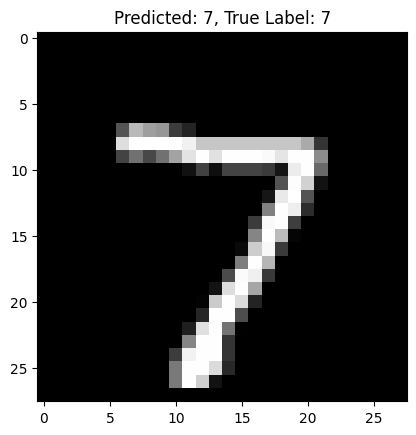

In [15]:
# Make predictions
predictions = model.predict(X_test)

# Display the first test image and predicted label
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predictions[0].argmax()}, True Label: {y_test[0]}")
plt.show()


In [16]:
# Save the model
model.save('mnist_classification_model.h5')

# Load the model (if needed)
# model = tf.keras.models.load_model('mnist_classification_model.h5')
